# Unit 5 - Financial Planning Assignment
## This script can be used to create two tools. One is for assessing monthly personal finances and the second is for forecasting a reasonable retirement plan using a defined amount of cryptocurrencies, stocks and bonds.

In [6]:
#Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [7]:
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [8]:
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [9]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [10]:
#Set current amount of crypto assets 
btc_amount = 1.2
eth_amount = 5.3

In [11]:
#create variable to hold request URLs 
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [12]:
requests.get(btc_url)

<Response [200]>

In [13]:
requests.get(eth_url)

<Response [200]>

In [14]:
response_btcdata = requests.get(btc_url)
response_ethdata = requests.get(eth_url)


In [15]:
response_contentbtc = response_btcdata.content
print(response_contentbtc)

response_contenteth = response_ethdata.content
print(response_contenteth)

# Formatting as json
btcdata = response_btcdata.json()
ethdata = response_ethdata.json()

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18605868,\n\t\t\t"total_supply": 18605868,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 35262.0000000000000000,\n\t\t\t\t\t"volume_24h": 59984528053,\n\t\t\t\t\t"market_cap": 657214280290,\n\t\t\t\t\t"percentage_change_1h": 0.4333805538103340,\n\t\t\t\t\t"percentage_change_24h": -3.0351655576522800,\n\t\t\t\t\t"percentage_change_7d": 3.9007715867513000,\n\t\t\t\t\t"percent_change_1h": 0.4333805538103340,\n\t\t\t\t\t"percent_change_24h": -3.0351655576522800,\n\t\t\t\t\t"percent_change_7d": 3.9007715867513000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1611172494\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1611172494,\n\t\t"num_cryptocurrencies": 1383,\n\t\t"error": null\n\t}\n}'
b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symb

In [16]:
import json 
# FORMAT JSON for BTC data with indents and output to screen
print(json.dumps(btcdata, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18605868,
            "total_supply": 18605868,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35262.0,
                    "volume_24h": 59984528053,
                    "market_cap": 657214280290,
                    "percentage_change_1h": 0.433380553810334,
                    "percentage_change_24h": -3.03516555765228,
                    "percentage_change_7d": 3.9007715867513,
                    "percent_change_1h": 0.433380553810334,
                    "percent_change_24h": -3.03516555765228,
                    "percent_change_7d": 3.9007715867513
                }
            },
            "last_updated": 1611172494
        }
    },
    "metadata": {
        "timestamp": 1611172494,
        "num_cryptoc

In [17]:
#Call out BTC current price
btc_value = (btcdata['data']['1']['quotes']['USD']['price'])
btc_value

35262.0

In [18]:
# FORMAT JSON for ETH data with indents and output to screen
print(json.dumps(ethdata, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114333443,
            "total_supply": 114333443,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1340.64,
                    "volume_24h": 52380216659,
                    "market_cap": 153217279287,
                    "percentage_change_1h": 2.17364637626472,
                    "percentage_change_24h": -1.31938622757662,
                    "percentage_change_7d": 28.2411483306617,
                    "percent_change_1h": 2.17364637626472,
                    "percent_change_24h": -1.31938622757662,
                    "percent_change_7d": 28.2411483306617
                }
            },
            "last_updated": 1611172462
        }
    },
    "metadata": {
        "timestamp": 1611172462,
        "num_cryp

In [19]:
#Call out ETH current price
eth_value = (ethdata['data']['1027']['quotes']['USD']['price'])
eth_value

1340.64

In [20]:
#Compute current values of my crypto and print current crypto wallet balance 
my_btc_value = btc_amount * btc_value
my_eth_value = eth_amount * eth_value
total_crypto_value = my_btc_value + my_eth_value
total_crypto_value

print(f"The current value of my {btc_amount} BTC is ${my_btc_value:0.2f}")
print(f"The current value of my {eth_amount} ETH is ${my_eth_value:0.2f}")

The current value of my 1.2 BTC is $42314.40
The current value of my 5.3 ETH is $7105.39


In [21]:
total_crypto_value = round(total_crypto_value,2)
total_crypto_value

49419.79

In [22]:
# Set current amount of shares data
shares_data = {
    "shares": [50, 200]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,50
SPY,200


In [23]:
load_dotenv()

True

In [24]:
#Set Alpaca API key and secret key 
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [25]:
#create the Alpaca API object

alpaca = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version ='v2'
)

today = pd.Timestamp('2021-01-15', tz='America/New_York').isoformat() ##giving us timestamp and timezone, using pandas functionality timestamp
today

tickers = ["AGG","SPY"]

timeframe = '1D'

df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_tickers.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-15 00:00:00-05:00  117.34  117.36  117.18  117.26  4776104  376.72   

                                                            
                             high    low   close    volume  
time                                                        
2021-01-15 00:00:00-05:00  377.58  373.7  375.68  78405054

In [26]:
#Calculate the current value of the stock portfolio
agg_price = float(df_tickers["AGG"]["close"])
spy_price = float(df_tickers["SPY"]["close"])

In [27]:
# Compute the current value in dollars of the stock portfolio
agg_value = agg_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_price * df_shares.loc["SPY"]["shares"]
total_stocks_value = agg_value + spy_value
total_stocks_value

80999.0

In [28]:
# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")

The current value of the 50 AGG shares is $5863.00
The current value of the 200 SPY shares is $75136.00


### Savings Health Analysis

In [29]:
#Set monthly household income 
monthly_income = 3000

In [30]:
#Create savings DataFrame

savings_data = {
    "amount": [total_crypto_value, total_stocks_value]
}

#Set the info
info = ["CRYPTO", "SHARES"]

#Create the shares DataFrame
df_savings = pd.DataFrame(savings_data, index=info)

# Display shares data
df_savings

,amount
CRYPTO,49419.79
SHARES,80999.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

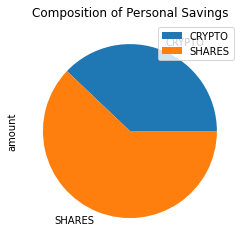

In [31]:
## Plot savings pie chat 
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_stocks_value
total_savings = round(total_savings,2)
total_savings

131803.69

In [29]:
#Validate savings health 
if total_savings > emergency_fund:
    print("Congratulations! You have enough in your emergency fund.")


Congratulations! You have enough in your emergency fund.


## Part 2 - Retirement Planning
### This script will use the Alpaca API to fetch historical closing prices for a retirement portfolio and then use the MCForecastTools toolkit to create Monte Carlo simulations to project the portfolio performance at 30 years.

In [31]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [32]:
from dotenv import load_dotenv
#load .env environment variables 
load_dotenv()

True

In [33]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [34]:
#create the Alpaca API object

alpaca = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version ='v2'
)

today = pd.Timestamp('2021-01-08', tz='America/New_York').isoformat() ##giving us timestamp and timezone, using pandas functionality timestamp
today

tickers = ["SPY","AGG"]

timeframe = '1D'

start = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

df_ticker.head()

AGG                                         \
                             open      high       low     close   volume   
time                                                                       
2015-05-01 00:00:00-04:00  110.49  110.5302  110.2450  110.3400  1144833   
2015-05-04 00:00:00-04:00  110.42  110.4715  110.1200  110.1307  1392549   
2015-05-05 00:00:00-04:00  110.19  110.2190  109.8400  110.0500  1341937   
2015-05-06 00:00:00-04:00  109.95  109.9700  109.6139  109.6700  1435844   
2015-05-07 00:00:00-04:00  109.85  110.0400  109.7600  109.9600  1880924   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-05-01 00:00:00-04:00  209.41  210.77  209.28  210.69   79942101  
2015-05-04 00:00:00-04:00  211.23  212.02  211.10  211.34   56064438  
2015-05-05 00:00:00-04:00  211.03  211.46  208.73  208.90   91499087  
2015-05-06 00:00:00-04:00  209.56  209.93  206.76  208.03  101710540  
2015-05-07 00:00:00-04:00  207.92  209.38  207.52  208.87   70211277

In [35]:
#Convert the API output to a DataFrame and preview the output.

In [36]:
df_closing_prices = pd.DataFrame()

#Fetch the closing prices of our stocks
df_closing_prices['AGG'] = df_ticker['AGG']['close']
df_closing_prices['SPY'] = df_ticker['SPY']['close']
df_closing_prices.head()

,AGG,SPY
time,,
2015-05-01 00:00:00-04:00,110.3400,210.69
2015-05-04 00:00:00-04:00,110.1307,211.34
2015-05-05 00:00:00-04:00,110.0500,208.90
2015-05-06 00:00:00-04:00,109.6700,208.03
2015-05-07 00:00:00-04:00,109.9600,208.87


In [37]:
#Cleaned the index to remove timestamp 
df_closing_prices.head()

,AGG,SPY
time,,
2015-05-01 00:00:00-04:00,110.3400,210.69
2015-05-04 00:00:00-04:00,110.1307,211.34
2015-05-05 00:00:00-04:00,110.0500,208.90
2015-05-06 00:00:00-04:00,109.6700,208.03
2015-05-07 00:00:00-04:00,109.9600,208.87


In [38]:
#Calculate the daily percent change in returns for both stocks 
df_daily_returns = df_closing_prices.pct_change().dropna()
df_daily_returns

,AGG,SPY
time,,
2015-05-04 00:00:00-04:00,-0.001897,0.003085
2015-05-05 00:00:00-04:00,-0.000733,-0.011545
2015-05-06 00:00:00-04:00,-0.003453,-0.004165
2015-05-07 00:00:00-04:00,0.002644,0.004038
2015-05-08 00:00:00-04:00,0.003092,0.013166
...,...,...
2020-04-27 00:00:00-04:00,-0.004346,0.014380
2020-04-28 00:00:00-04:00,0.003509,-0.004667
2020-04-29 00:00:00-04:00,0.001535,0.025965


### Configure a Monte Carlo Simulation and Plot the results for a 30 Year Retirement Option with an initial investment of $20,000

In [70]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns 
MC_thirtyyear = MCSimulation (
    portfolio_data = df_ticker,
    weights = [.60, .40],
    num_simulation = 500, 
    num_trading_days = 30 * 252 
)

MC_thirtyyear.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004806,1.007572,0.993140,0.984881,1.009514,0.993226,1.011280,0.993102,0.999470,0.990577,...,0.998566,0.997260,1.004001,1.002712,0.990758,0.995631,1.005061,0.996295,0.995878,0.989360
2,1.006977,1.010026,0.998618,0.975783,1.001898,0.988035,1.010183,0.996772,0.995446,0.989030,...,1.002163,0.995873,1.004708,0.997563,0.986633,0.992313,1.009074,0.994228,0.999259,0.993137
3,1.009532,1.009957,1.012946,0.978988,1.005731,0.986283,1.011616,0.996195,0.995490,0.990655,...,0.996716,0.998219,1.004722,0.992131,0.985769,0.980862,1.017055,0.999332,1.005997,0.976573
4,1.006082,1.008811,1.020394,0.975091,1.010572,0.979025,1.015903,1.001271,1.003467,1.006582,...,0.995772,0.994772,0.997513,0.997416,0.999640,0.975228,1.015752,0.994332,1.008050,0.978590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.100098,2.822366,6.800559,4.222605,3.186910,3.908386,8.450948,3.334340,2.534962,6.214473,...,2.066236,3.081451,3.373291,3.963240,5.319486,5.049427,3.845748,4.581972,1.321255,2.852384
7557,4.082984,2.839823,6.805425,4.260004,3.195263,3.860599,8.382911,3.335228,2.519228,6.236773,...,2.075322,3.113207,3.363082,3.962422,5.305392,5.089886,3.864053,4.595603,1.328001,2.847117
7558,4.071494,2.847809,6.852349,4.245605,3.210237,3.868252,8.369622,3.364241,2.510391,6.253699,...,2.098428,3.110158,3.361300,3.971805,5.340769,5.040391,3.877245,4.570963,1.333071,2.852029
7559,4.057471,2.859757,6.873286,4.243194,3.205309,3.905123,8.446888,3.380238,2.505662,6.299908,...,2.089542,3.113724,3.378284,3.959901,5.348128,5.079439,3.864986,4.556924,1.322346,2.847731


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

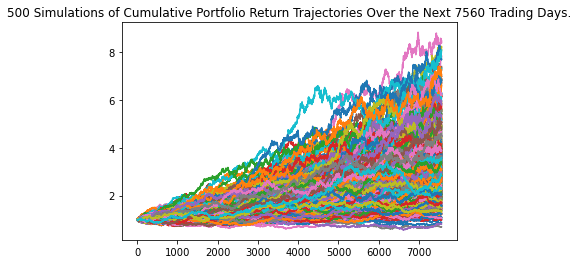

In [71]:
#Plot Simulation Results 
line_plot = MC_thirtyyear.plot_simulation()
line_plot

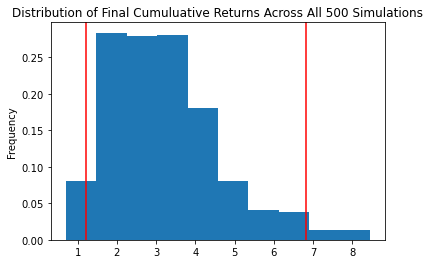

In [72]:
#Plot the Probability Distribution and Confidence Intervals 
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [74]:
#Create table of Summary Statistics
tbl = MC_thirtyyear.summarize_cumulative_return()
tbl

count           500.000000
mean              3.212878
std               1.402151
min               0.697089
25%               2.171521
50%               3.025452
75%               3.924423
max               8.455602
95% CI Lower      1.216284
95% CI Upper      6.826429
Name: 7560, dtype: float64

In [75]:
simulated_returns_data = {
    "mean": list(MC_thirtyyear.simulated_return.mean(axis=1)),
    "median": list(MC_thirtyyear.simulated_return.median(axis=1)),
    "min": list(MC_thirtyyear.simulated_return.min(axis=1)),
    "max": list(MC_thirtyyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999913,0.999796,0.984881,1.016414
2,1.000008,1.000516,0.975783,1.019351
3,1.000294,1.000357,0.973246,1.026156
4,1.000533,1.000367,0.968528,1.030411


### Given an initial investment of $20,000, calculate the expected portfolio return in dollars at the 95% lower and upper confidence intervals.

In [77]:
# Set initial investment
initial_investment = 20000

# Multiply initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,20000.000000,20000.000000,20000.000000,20000.000000
1,19998.259270,19995.923578,19697.620688,20328.286706
2,20000.167831,20010.310055,19515.660835,20387.023219
3,20005.883495,20007.140309,19464.923223,20523.129493
4,20010.664504,20007.335767,19370.557930,20608.217341


In [78]:
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

In [79]:
# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next year will end in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next year will end in the range of $24325.68 and $136528.58.


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [81]:
initial_investment = 20000 * 1.5

# Multiply new initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,30000.000000,30000.000000,30000.000000,30000.000000
1,29997.388905,29993.885367,29546.431032,30492.430059
2,30000.251746,30015.465082,29273.491252,30580.534829
3,30008.825242,30010.710463,29197.384835,30784.694240
4,30015.996757,30011.003651,29055.836896,30912.326012


In [82]:
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

In [83]:
# Print results based on 50% increase in initial investment 
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next year will end in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next year will end in the range of $36488.52 and $204792.87.


### Optional Challenge - Early Retirement
### Configure a Monte Carlo Simulation and plot results for a Five Year Retirement Option with initial investment of $60,000

In [85]:
# Configure a Monte Carlo simulation to forecast 5 years cumulative returns 
MC_fiveyear = MCSimulation (
    portfolio_data = df_ticker,
    weights = [.60, .40],
    num_simulation = 500, 
    num_trading_days = 5 * 252 
)

MC_fiveyear.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004791,1.002989,1.007965,0.999952,1.007033,1.002225,1.009091,0.995748,1.000652,1.001772,...,1.002712,0.993784,1.005186,1.004241,1.003450,1.001443,0.996697,0.990914,1.000810,0.999048
2,0.998723,0.998958,1.010638,1.010614,1.004461,0.999206,1.015270,0.999021,1.000582,1.001819,...,1.004056,1.001399,1.009457,0.999789,0.988793,0.991932,1.004134,0.988637,0.997255,1.007906
3,1.001357,1.008022,1.006466,1.021165,1.002733,1.004001,1.013778,1.000563,1.001785,1.006219,...,0.999714,0.999730,1.007872,1.000554,0.994073,0.979194,1.005266,0.990678,1.002632,1.010498
4,1.003988,1.006531,1.004191,1.022643,0.998877,1.006314,1.016791,0.997622,1.009730,1.005582,...,0.990661,1.007470,1.010293,1.008921,0.991412,0.979180,1.006379,0.989296,1.000926,1.010966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.597022,1.514336,1.211419,1.489238,1.232753,1.188481,1.347445,0.876892,1.304762,1.457543,...,1.506898,0.890802,1.185678,1.281543,1.038665,0.808614,1.006721,1.819495,1.122433,0.960243
1257,1.595017,1.503470,1.217054,1.495314,1.228840,1.186633,1.355667,0.875282,1.317353,1.459045,...,1.501393,0.885158,1.180679,1.283469,1.028111,0.815502,1.012742,1.808215,1.119036,0.948881
1258,1.605243,1.493800,1.215383,1.491233,1.232098,1.167550,1.343271,0.878335,1.314735,1.445566,...,1.508310,0.887489,1.199350,1.281597,1.036929,0.818970,1.004867,1.816726,1.112157,0.943232
1259,1.596262,1.500535,1.209566,1.479773,1.227238,1.168079,1.339041,0.877156,1.309775,1.440959,...,1.514599,0.887692,1.199461,1.275715,1.038856,0.818726,0.997333,1.796963,1.106098,0.944825


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

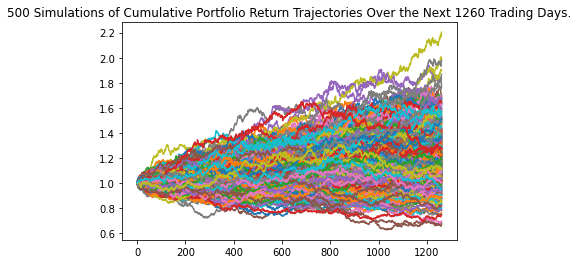

In [86]:
#Plot Simulation Results 
line_plot2 = MC_fiveyear.plot_simulation()
line_plot2

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

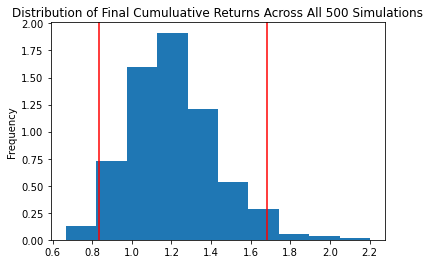

In [87]:
#Plot the Probability Distribution and Confidence Intervals 
dist_plot2 = MC_fiveyear.plot_distribution()
dist_plot2

In [88]:
#Create table of Summary Statistics
tbl2 = MC_fiveyear.summarize_cumulative_return()
tbl2

count           500.000000
mean              1.208106
std               0.222949
min               0.666976
25%               1.056719
50%               1.181741
75%               1.347928
max               2.202872
95% CI Lower      0.834319
95% CI Upper      1.680880
Name: 1260, dtype: float64

In [101]:
simulated_returns_data2 = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns2 = pd.DataFrame(simulated_returns_data2)

# Display sample data
df_simulated_returns2.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000149,1.000376,0.984029,1.015761
2,1.000264,1.000175,0.978704,1.023441
3,1.000765,1.000847,0.968431,1.026558
4,1.000789,1.001168,0.959762,1.031345


In [102]:
# Set initial investment
initial_investment2 = 60000

# Multiply initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl2 = initial_investment2 * df_simulated_returns2

# Display sample data
cumulative_pnl2.head()

,mean,median,min,max
0,60000.000000,60000.000000,60000.000000,60000.000000
1,60008.919262,60022.561262,59041.714432,60945.640245
2,60015.820061,60010.527927,58722.235249,61406.441238
3,60045.871947,60050.823123,58105.884282,61593.464017
4,60047.330280,60070.081178,57585.718988,61880.705357


In [111]:
ci_lower2 = round(tbl2[8]*60000,2)
ci_upper2 = round(tbl2[9]*60000,2)

In [114]:
# Print results based on initial investment of $60000
print(f"There is a 95% chance that an initial investment of $60,000 in the portfolio"
      f" over the next five years will end in the range of"
      f" ${ci_lower2} and ${ci_upper2}.")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next five years will end in the range of $50059.17 and $100852.78.


### Configure a Monte Carlo Simulation and plot results for a Ten Year Retirement Option with initial investment of $60,000

In [96]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns 
MC_tenyear = MCSimulation (
    portfolio_data = df_ticker,
    weights = [.60, .40],
    num_simulation = 500, 
    num_trading_days = 10 * 252 
)

MC_tenyear.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998931,0.999805,1.008038,1.008682,0.996487,0.997919,0.993368,1.003263,0.996126,0.998795,...,1.011668,0.992799,1.005851,1.002726,1.001164,1.000409,0.997461,1.013400,1.003376,0.993651
2,0.999500,1.006577,1.011245,1.010844,1.006300,1.006879,0.978279,1.002828,0.988478,0.992828,...,1.012434,1.001537,1.008407,0.997578,1.005221,1.005008,0.990483,1.012185,1.013457,0.998270
3,0.993566,1.004390,1.018035,1.002621,1.015688,1.002427,0.983608,0.997729,0.984211,0.993289,...,1.015989,1.010973,1.017460,0.988579,1.004759,0.999016,0.985952,1.012467,1.013700,0.992145
4,1.001002,0.993464,1.019682,1.008464,1.021843,0.999827,0.986358,0.999653,0.982997,0.988159,...,1.029716,1.017071,1.015576,0.987453,1.002386,0.987850,0.984018,1.008172,1.015886,0.990014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.386371,1.510641,1.616630,1.308468,0.685808,1.355960,1.112950,1.282454,2.599404,1.308929,...,1.624480,1.804552,1.246257,1.273234,1.381084,1.003231,1.322317,1.376363,1.665052,1.536505
2517,1.389561,1.516146,1.621352,1.315176,0.690747,1.361800,1.102745,1.292712,2.596051,1.324425,...,1.637093,1.797802,1.250602,1.277852,1.391144,0.997730,1.327984,1.379672,1.657723,1.533898
2518,1.386802,1.510408,1.600210,1.305254,0.691302,1.362154,1.109796,1.280380,2.591325,1.310282,...,1.636462,1.802128,1.245759,1.281395,1.389861,0.989658,1.326230,1.388284,1.656094,1.529673
2519,1.379198,1.505041,1.601388,1.314681,0.686632,1.368437,1.107893,1.279791,2.593244,1.313747,...,1.638592,1.794340,1.240002,1.275192,1.395022,0.989396,1.323626,1.387661,1.658932,1.528203


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

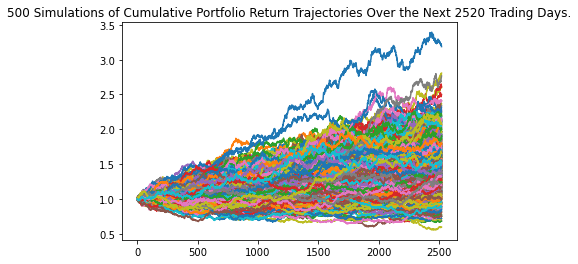

In [97]:
#Plot Simulation Results 
line_plot2 = MC_tenyear.plot_simulation()
line_plot2

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

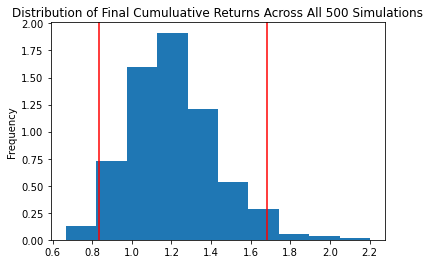

In [98]:
#Plot the Probability Distribution and Confidence Intervals 
dist_plot3 = MC_fiveyear.plot_distribution()
dist_plot3

In [99]:
#Create table of Summary Statistics
tbl3 = MC_tenyear.summarize_cumulative_return()
tbl3

count           500.000000
mean              1.463249
std               0.374152
min               0.594338
25%               1.204420
50%               1.433630
75%               1.682763
max               3.188737
95% CI Lower      0.817534
95% CI Upper      2.250868
Name: 2520, dtype: float64

In [100]:
simulated_returns_data3 = {
    "mean": list(MC_tenyear.simulated_return.mean(axis=1)),
    "median": list(MC_tenyear.simulated_return.median(axis=1)),
    "min": list(MC_tenyear.simulated_return.min(axis=1)),
    "max": list(MC_tenyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns3 = pd.DataFrame(simulated_returns_data3)

# Display sample data
df_simulated_returns3.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999721,0.999496,0.979928,1.013400
2,1.000118,1.000224,0.978279,1.024068
3,1.000572,1.000654,0.978141,1.030929
4,1.000725,1.001229,0.971371,1.032085


In [105]:
# Set initial investment
initial_investment3 = 60000

# Multiply initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl3 = initial_investment3 * df_simulated_returns3

# Display sample data
cumulative_pnl3.head()

,mean,median,min,max
0,60000.000000,60000.000000,60000.000000,60000.000000
1,59983.273132,59969.751409,58795.693528,60804.014101
2,60007.080277,60013.411674,58696.726623,61444.107087
3,60034.304522,60039.238075,58688.461570,61855.738980
4,60043.490991,60073.751804,58282.284143,61925.075857


In [108]:
ci_lower3 = round(tbl3[8]*60000,2)
ci_upper3 = round(tbl3[9]*60000,2)

In [113]:
# Print results based on initial investment of $60000
print(f"There is a 95% chance that an initial investment of $60,000 in the portfolio"
      f" over the next ten years will end in the range of"
      f" ${ci_lower3} and ${ci_upper3}.")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next ten years will end in the range of $49052.07 and $135052.06.
